SHIVAM MISHRA >> ASSIGNMENT 1 >> PART 2

## Democratic Presidential Candidate - 2020

### Table of Contents

1. Motivation <br>
2. Data-Set Description <br>
3. Introduction <br>
4. Data Loading and Data Wrangling <br>
5. Respondents Analysis <br>
6. Party Analysis <br>
7. Democrat Candidate Analysis <br>
8. Conclusion <br>
9. References <br>

#### 1. Motivation

I am interested in politics; it's pretty standard for anyone hailing from India. I love watching the speeches. I have been an active member of debate and extempore clubs during my undergrad.
As I moved here back in August, I was unable to hold a conversation with anyone regarding political scenarios in the US due to my lack of knowledge about US politics. My lack of insight motivated me to take this data-set for analysis. 

#### 2. Data-set Description

The data-set is extracted from the github repository named "dem-primary-2020" of Walt Hickey [1]. This repository consists results of the Insider poll conducted on SurveyMonkey Audience. The repository is continually updated. For this analysis, the poll results in the past one month is considered.

In the poll, the respondents correspond to the following series of questions.

a) Do you think you will participate in the 2020 presidential primary? <br>
b) What best describes your political beliefs? <br>
c) Are you a registered voter? <br>
d) Which race/ethnicity best describes you? <br>
e) Which of the following potential Democratic primary contenders have you ever heard of? <br>
f) Which of the following candidates would you be satisfied with in the event they became the Democratic nominee? <br>
g) Which of the following candidates would you not be satisfied with in the event they became the Democratic nominee? <br>
h) Which of the following candidates do you think would likely win an election against President Donald Trump? <br>
i) Which of the following candidates do you think would likely lose an election against President Donald Trump? <br>

The respondents can select any number of democratic presidential candidates they think are eligible for a particular question. The respondents do not rank the candidates in any of the question. Apart from these response to these questions, respondent's age, gender, household income and region is also recorded.

Note regarding question (a):
Question (a) provides four choices to the respondent which are listed below:

1) Yes I will likely vote in my state's Democratic primary or caucus                           
2) Yes I will likely vote in my state's Republican primary or caucus                           
3) I don't know or I'd rather not say                                                          
4) No I don't currently plan to vote in a major party's 2020 presidential primary or caucus 

The respondent can select only one of these four. Based on this answer political affiliation of the respondent is categorised into "Democrat", "Republican" and "Unknown".
"Democrat" are those who are likely to vote in Democratic Primary, "Republicans" are those who are likely to vote in Republican Primary, while those who choose not to reveal their preference or aren't sure about it are put into the "Unknown" category.


The data-set contains the results for the following Democratic presidential candidates.

1) Fmr. V.P. Joe Biden <br>
2) Sen. Cory Booker <br>
3) Gov. Steve Bullock <br>
4) Fmr. HUD Secretary Julian Castro <br>
5) Rep. Tulsi Gabbard <br>
6) Sen. Kamala Harris <br>
7) Sen. Amy Klobuchar <br>
8) Fmr. Rep. Beto O'Rourke <br>
9) Rep. Tim Ryan <br>
10) Sen. Bernie Sanders <br>
11) Sen. Elizabeth Warren <br>
12) Rep. John Delaney <br>
13) South Bend Mayor Pete Buttigieg <br>
14) Marianne Williamson <br>
15) Andrew Yang <br>
16) Sen. Michael Bennet <br>
17) Tom Steyer <br>
18) NYC Mayor Bill de Blasio

#### 3. Introduction 

This analysis primarily focuses on forecasting Democratic Presidential Candidate. 

First, the data-set and its relevancy is analysed. Then in the next section, support of democrats and republicans among different classes of respondents is explored. And then finally, analysis proceeds to solve the above question. Note a special attention is given to the respondents whose political affiliation is unknown.

#### 4. Data Loading and Data Wrangling

The data is loaded from the local device in the form of csv files. Poll records from nine separate csv files are collected into one. Before accumulation, some long labels (which are going to be used frequently) are changed to some short labels, which captures the essence of the previous label and is small enough to be handled easily.

Also, based on the respondent's response on the question "Do you think you will participate in the 2020 presidential primary?", two separate features, one corresponding to whether or not they will participate in presidential primary and another corresponding to their political affiliation is developed.

The shape of the final data-frame shows that 10,074 individual responses are considered for this analysis.

In [1]:
import pandas as pd


# labels to be renamed
rename_heads = {'Do you think you will participate in the 2020 presidential primary?':'Participate',
               'What best describes your political beliefs?': 'Political_Belief',
               'Are you a registered voter?': 'Registered_Voter',
               'Which race/ethnicity best describes you? (Please choose only one.)':'Race', 
               'Household Income': 'H_Income'}

# democratic presidential candidate names considered in this analysis. The one who dropped out of the race are dropped 
# out from the poll results as well.

candidate_names = ["Fmr. V.P. Joe Biden", 
"Sen. Cory Booker", 
"Gov. Steve Bullock", 
"Fmr. HUD Secretary Julian Castro", 
"Rep. Tulsi Gabbard",
"Sen. Kamala Harris",
"Sen. Amy Klobuchar",
"Fmr. Rep. Beto O'Rourke",
"Rep. Tim Ryan",
"Sen. Bernie Sanders",
"Sen. Elizabeth Warren",
"Rep. John Delaney",
"South Bend Mayor Pete Buttigieg",
"Marianne Williamson",
"Andrew Yang",
"Sen. Michael Bennet",
"Tom Steyer",
"NYC Mayor Bill de Blasio"]

In [2]:
# Accumulating the data-frames for all csv files into a list.

final_df = []
for i in range(17, 26):
    file_num = str(i)
    file_path = "D:/UMD/ENPM 808W/folder_2/dem-primary-2020-master/" + str(i) + ".csv"
    df = pd.read_csv(file_path)
    
    #renaming labels for some columns for all the csv files used in the analysis
    
    df = df.rename(columns = rename_heads)
    df1 = df[['Respondent ID', 'Start Date', 'Participate', 'Political_Belief', 'Registered_Voter', 'Race', 
             'Age', 'Gender', 'H_Income', 'Region', 'Device Type']]
    df2 = df
    
    i = 0
    for col in df.columns:
        values = df[col].value_counts().keys().tolist()
        
        #dropping any columns that have names other than the present running democratic candidates
        if values[0] not in candidate_names:
            df2 = df2.drop(col, axis=1)
        else:
            df2 = df2.rename(columns={col:'col'+str(i)})
            i = i+1
    
    df_temp = pd.concat([df1, df2], axis= 1)
    final_df.append(df_temp)

In [5]:
# Joining all dataframes into a single dataframe
df = final_df[0]

for j in range(1, len(final_df)):
    df = pd.concat([df, final_df[j]], axis = 0)
print("Data-frame shape", df.shape)

Data-frame shape (10074, 101)


In [4]:
# Response of Respondents to Question (a) {see in data-set description section}

df['Participate'].value_counts()

Yes I will likely vote in my state's Democratic primary or caucus                           4215
Yes I will likely vote in my state's Republican primary or caucus                           2947
I don't know or I'd rather not say                                                          1597
No I don't currently plan to vote in a major party's 2020 presidential primary or caucus    1300
Name: Participate, dtype: int64

In [7]:
# Functions that generate two different labels for participation and political affiliation

def func_affiliation(str_val):
    if str_val[0:3] == 'Yes':
        if str_val[37]=='D':
            return 'Democrat'
        elif str_val[37]=='R':
            return 'Republican'
    else:
        return 'Unknown'
    
def func_par(str_val):
    if str_val[0:3] == 'Yes':
        return 'Yes'
    elif str_val[0:2] == 'No':
        return 'No'
    else:
        return 'Unknown'

In [8]:
# Extracting two new labels

df['Affiliation'] = df['Participate'].apply(lambda x: func_affiliation(str(x)))
df['Participate'] = df['Participate'].apply(lambda x: func_par(str(x)))

#### 5. Respondents Analysis

In this section, an analysis is done on the responsdent's demographic.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

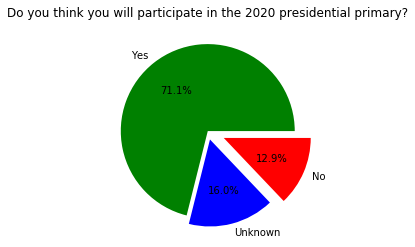

In [10]:
fig, ax = plt.subplots(1,1)
plt.title("Do you think you will participate in the 2020 presidential primary?")
ax.pie(df.Participate.value_counts(),explode=(0,0.1, 0.2), autopct='%1.1f%%', labels = ['Yes','Unknown', 'No'], colors=['g','b', 'r'])
plt.axis = 'equal'

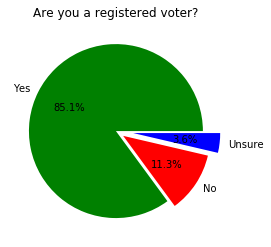

In [11]:
fig, ax = plt.subplots(1,1)
plt.title("Are you a registered voter?")
ax.pie(df.Registered_Voter.value_counts(),explode=(0,0.1, 0.2), autopct='%1.1f%%', labels = ['Yes','No', 'Unsure'], colors=['g','r', 'b'])
plt.axis = 'equal'

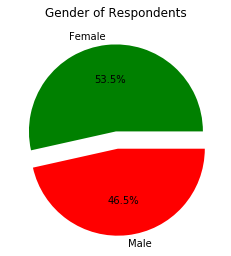

In [12]:
fig, ax = plt.subplots(1,1)
plt.title("Gender of Respondents")
ax.pie(df.Gender.value_counts(),explode=(0,0.2), autopct='%1.1f%%', labels = ['Female','Male'], colors=['g','r'])
plt.axis = 'equal'

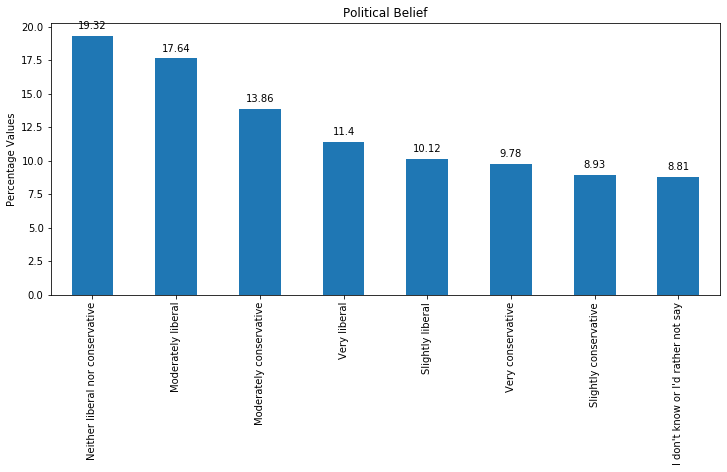

In [13]:
sample_size = len(df)

temp_df = df['Political_Belief'].value_counts()*100/sample_size
plt.figure(figsize=(12,5))
plt.ylabel("Percentage Values")
plt.title("Political Belief")
ax = temp_df.plot.bar()
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

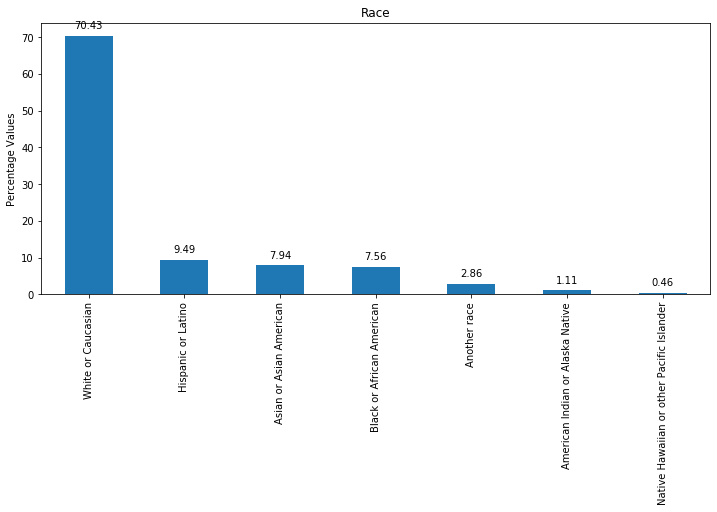

In [14]:
temp_df = df['Race'].value_counts()*100/sample_size
plt.figure(figsize=(12,5))
plt.ylabel("Percentage Values")
plt.title("Race")
ax = temp_df.plot.bar()
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

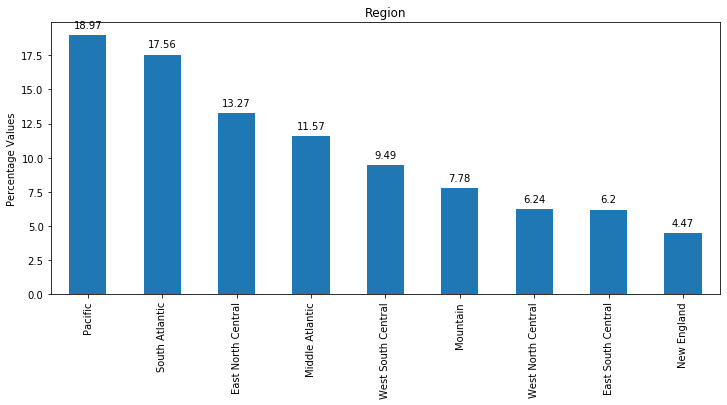

In [15]:
temp_df = df['Region'].value_counts()*100/sample_size
plt.figure(figsize=(12,5))
plt.ylabel("Percentage Values")
plt.title("Region")
ax = temp_df.plot.bar()
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

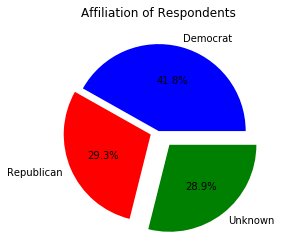

In [17]:
fig, ax = plt.subplots(1,1)
plt.title("Affiliation of Respondents")
ax.pie(df.Affiliation.value_counts(),explode=(0,0.1, 0.2), autopct='%1.1f%%', labels = ['Democrat','Republican', 'Unknown'], colors=['b','r', 'g'])
plt.axis = 'equal'

Out of around 10k individuals who responded for the polls, almost 71% plan to participate in presidential primary and around 85% are registered voter. This justifies the use of this database for forecasting purpose.<br> 
The gender of respondents is well balanced, and so is political belief. Around 39% of the respondents identify themselves as liberals and around 33% of respondents identify themselves as conservatives. <br>
The Race of the Seventy percent (70) of the respondents are "White". This corresponds to the race distribution in USA, which has 72.4 % of white population. <br>
Around 42 % of the respondents are democrats, other 30% respondents are republicans. Political affiliation of the remaining is unknown, who can either vote for democrats or republicans. <br>

#### 6. Party Analysis 

In this section, a number of pie and bar charts are generated to better understand which section of society supports which party. Not all questions regarding this are explored, but only some popular questions are explored. Popularity of the republican and democratic parties among different age groups, household income, political belief, gender and race is explored.  

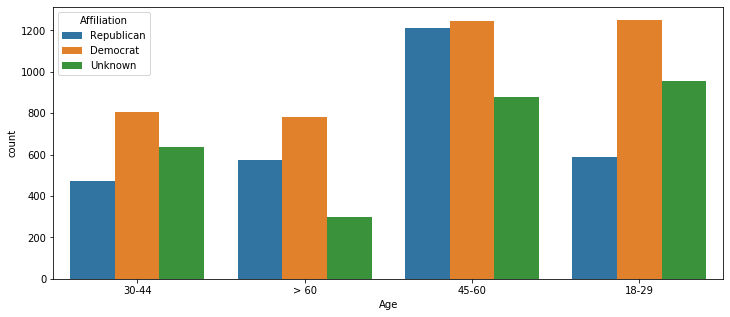

In [19]:
import seaborn as sns
plt.figure(figsize=(12,5))
ax = sns.countplot(x="Age", hue="Affiliation", data=df)

Support for democrats and republicans in the age-group 45-60 is evenly distributed. 
But in the age group 18-29 and 30-44, support for republicans is almost half of the support for democrats while the number of people whose political affiliation is unknown is greater than the number of people supporting republicans. <br>
This can be due to the continuously decreasing approval rating of the President Trump [2] This suggests that a chunk of people who voted for Republicans in the last election are now unsure about President Trump. They may or may not vote for President Trump in 2020.<br>

Also one more thing which can be noticed from this distribution is the fact that democrats are very popular among the age group of 18-29. This may be attributed to the fact that a greater number of us citizens identifying themselves as liberals has risen since 1992. 

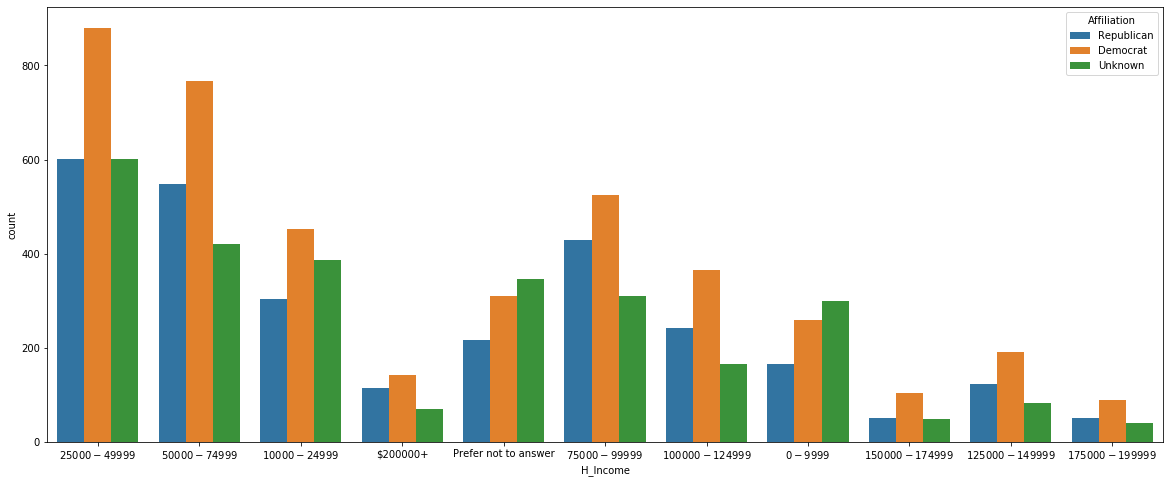

In [20]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="H_Income", hue="Affiliation", data=df)

No clear support to any party in any income group. This suggests that the major parties in US aren't able to echo an economic plan to people which can gather them support. No income group identifies themselves with any specific party. The support is unsurpiringly fairly distributed.

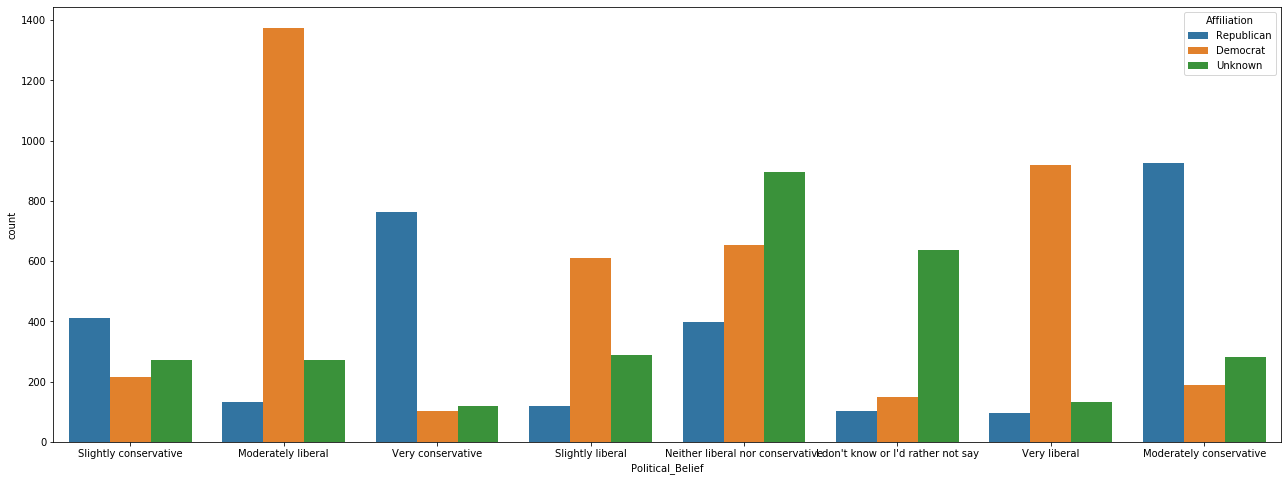

In [21]:
plt.figure(figsize=(22,8))
ax = sns.countplot(x="Political_Belief", hue="Affiliation", data=df)

Anyone who identifies themselves as liberal leans heavily towards democrats. Similiarly, anyone who identifies themselves as conservative tends to be a republican. This is pretty straight forward and is as expected. But since there is a continous rise in the number of people who identify themselves as liberals [3], the republicans may want to losen their conservatie stance a little bit.  

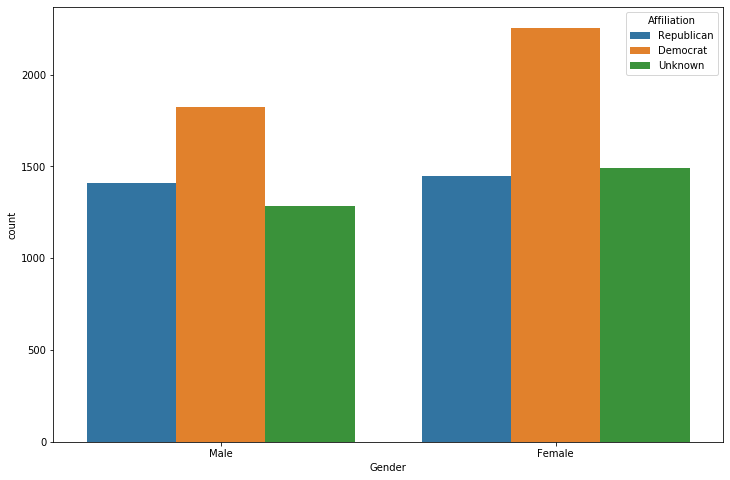

In [24]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Gender", hue="Affiliation", data=df)

This plot is rather surprising. A greater number of female supports democrats. The number of female who are unsure about their affiliations is almost equal to number of people who supports republicans. <br>
The number of male respondents suppoorting democrats is also greater than the one's supporting republicans. The point to notice is that even in the male respondent's category number of people whose political affiliation is unknow is almost  equal to the male respondents supporting republicans. <br>

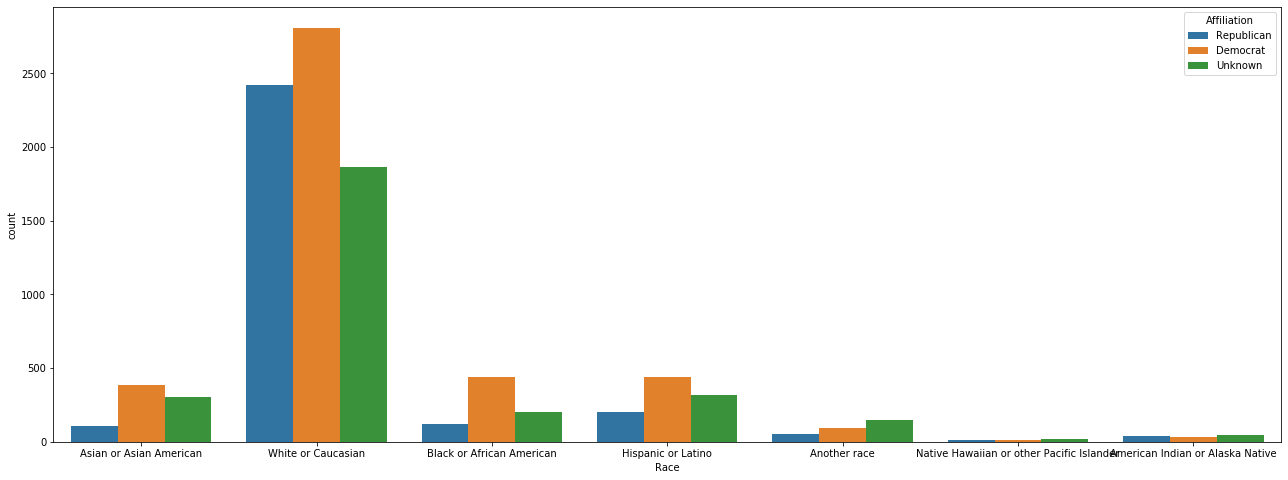

In [23]:
plt.figure(figsize=(22,8))
ax = sns.countplot(x="Race", hue="Affiliation", data=df)

Very small percentage of our Asian American and African American respondents support republicans. A high number is into the unknown affiliation pool. This is consistent with the negative press President Trump receives regarding his actions on Racism in US. The support among white voters on the other hand is fairly evenly distributed.

#### 7. Democratic Candidates Analysis

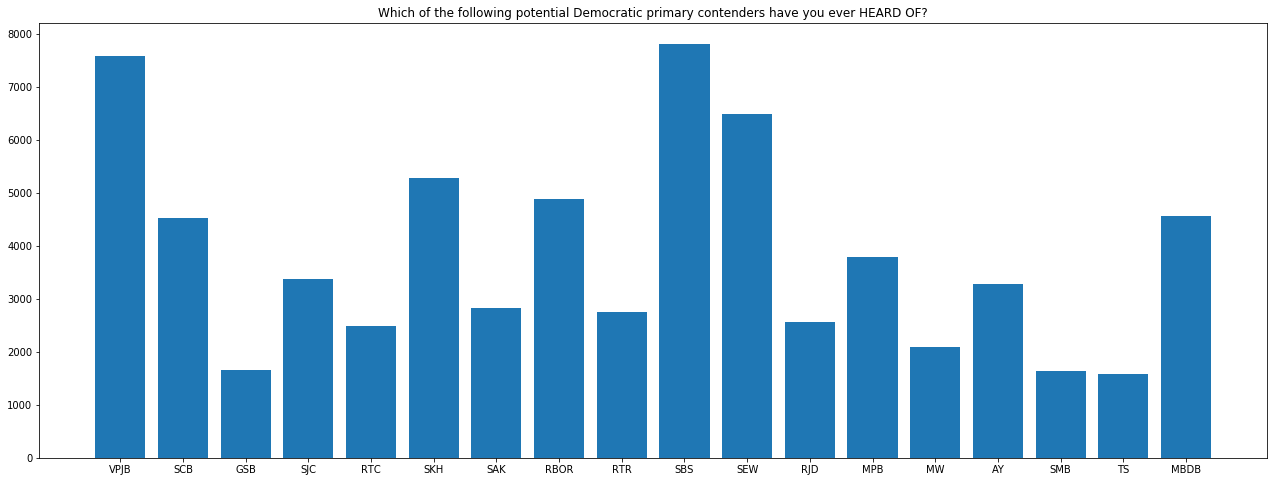

In [25]:
col_name_1 = []
for i in range(11, 29):
    col_name_1.append(df.columns[i])
temp_df = df[col_name_1]

candidate_names = ["Fmr. V.P. Joe Biden", 
"Sen. Cory Booker", 
"Gov. Steve Bullock", 
"Fmr. HUD Secretary Julian Castro", 
"Rep. Tulsi Gabbard",
"Sen. Kamala Harris",
"Sen. Amy Klobuchar",
"Fmr. Rep. Beto O'Rourke",
"Rep. Tim Ryan",
"Sen. Bernie Sanders",
"Sen. Elizabeth Warren",
"Rep. John Delaney",
"South Bend Mayor Pete Buttigieg",
"Marianne Williamson",
"Andrew Yang",
"Sen. Michael Bennet",
"Tom Steyer",
"NYC Mayor Bill de Blasio"]

candidate_initials =['VPJB', 'SCB', 'GSB', 'SJC', 'RTC', 'SKH','SAK', 'RBOR', 'RTR', 'SBS', 'SEW', 'RJD', 'MPB', 'MW', 'AY', 'SMB'
                    , 'TS', 'MBDB']

popularity_list = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    popularity_list.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('Which of the following potential Democratic primary contenders have you ever HEARD OF?')
plt.bar(candidate_initials, popularity_list)
plt.show()

Vice President Joe Biden, Senator Bernie Sanders and Senator Elizabeth Warren are the top 3 popular contenders. Popularity of VPJB and SBS can be attributed to the fact that one held the VP office during President Obama Administration while the other ran against Clinton in 2016 Democratic primary. 

Sen Elizabeth Warren who is new to the presidential arena is pretty famous as well. Her popularity doesn't lie far behind VPJB and SBS. The other popular presidential candidates are Sen. Kamala Harris, Fmr. Rep. Beto O'Rourke and NYC Mayor Bill de Blasio.

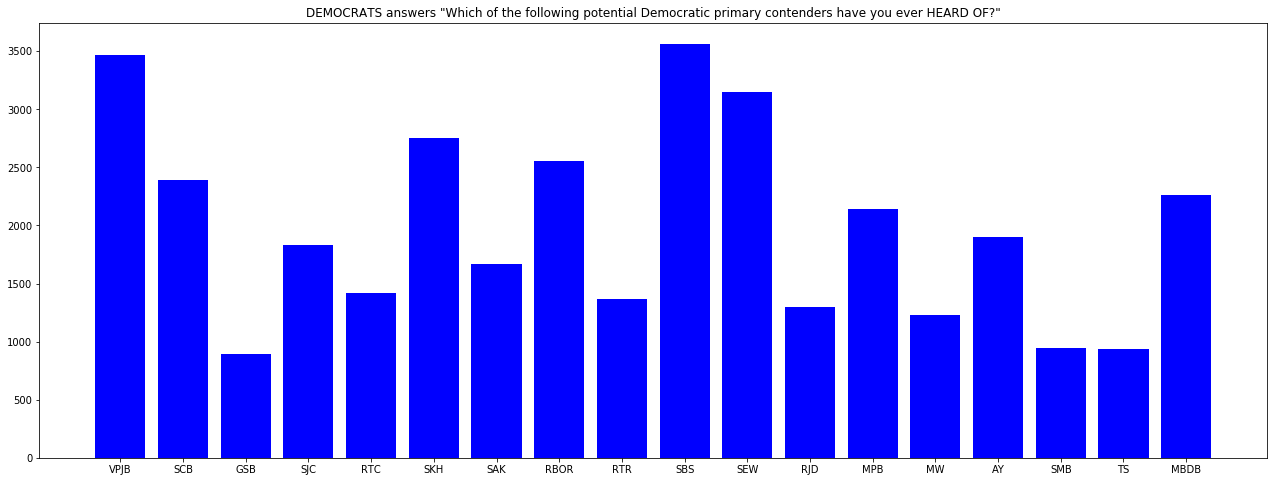

In [30]:
df_democrat = df[df['Affiliation'] == 'Democrat']

col_name_1 = []
for i in range(11, 29):
    col_name_1.append(df_democrat.columns[i])
temp_df = df_democrat[col_name_1]

popularity_list = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    popularity_list.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('DEMOCRATS answers "Which of the following potential Democratic primary contenders have you ever HEARD OF?"')
plt.bar(candidate_initials, popularity_list, color='b')
plt.show()

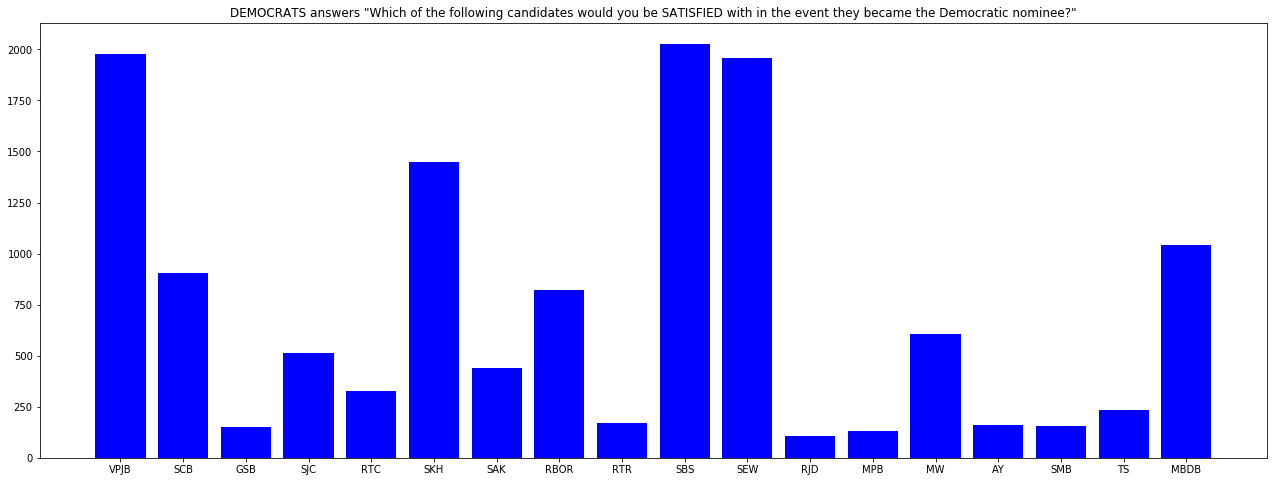

In [31]:
col_name_1 = []
for i in range(29, 47):
    col_name_1.append(df_democrat.columns[i])
temp_df = df_democrat[col_name_1]

satisfaction_list = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    satisfaction_list.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('DEMOCRATS answers "Which of the following candidates would you be SATISFIED with in the event they became the Democratic nominee?"')
plt.bar(candidate_initials, satisfaction_list, color='b')
plt.show()

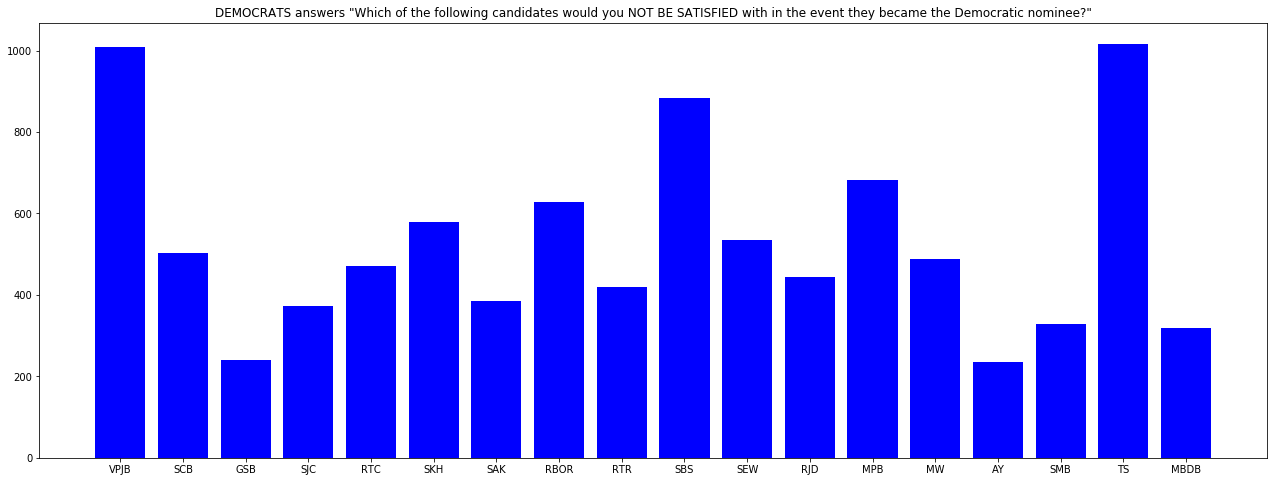

In [32]:
col_name_1 = []
for i in range(47, 65):
    col_name_1.append(df_democrat.columns[i])
temp_df = df_democrat[col_name_1]

non_satisfaction_list = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    non_satisfaction_list.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('DEMOCRATS answers "Which of the following candidates would you NOT BE SATISFIED with in the event they became the Democratic nominee?"')
plt.bar(candidate_initials, non_satisfaction_list, color='b')
plt.show()

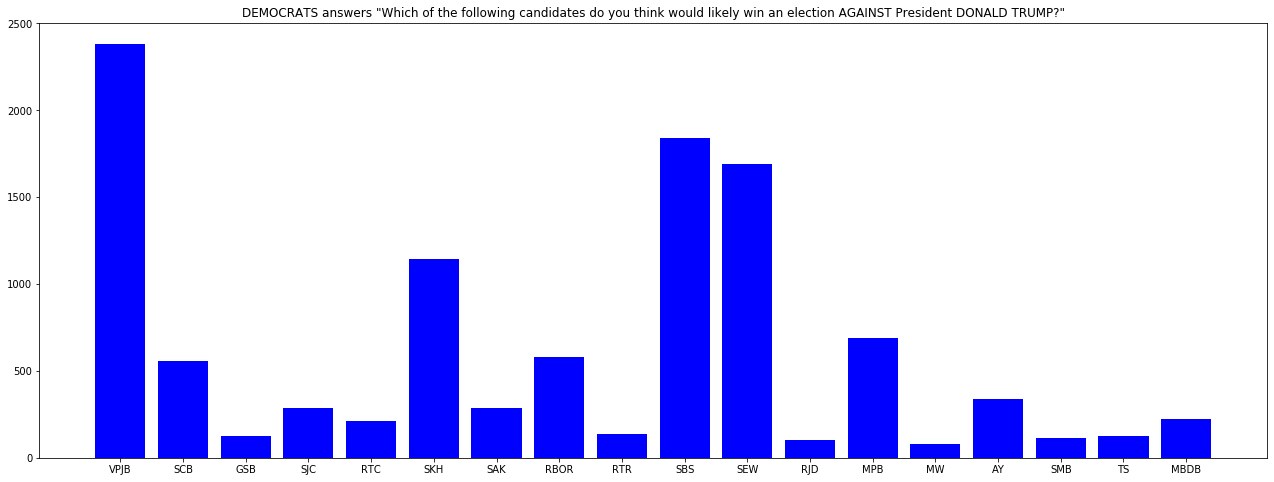

In [33]:
col_name_1 = []
for i in range(65, 83):
    col_name_1.append(df_democrat.columns[i])
temp_df = df_democrat[col_name_1]

list1 = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    list1.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('DEMOCRATS answers "Which of the following candidates do you think would likely win an election AGAINST President DONALD TRUMP?"')
plt.bar(candidate_initials, list1, color='b')
plt.show()

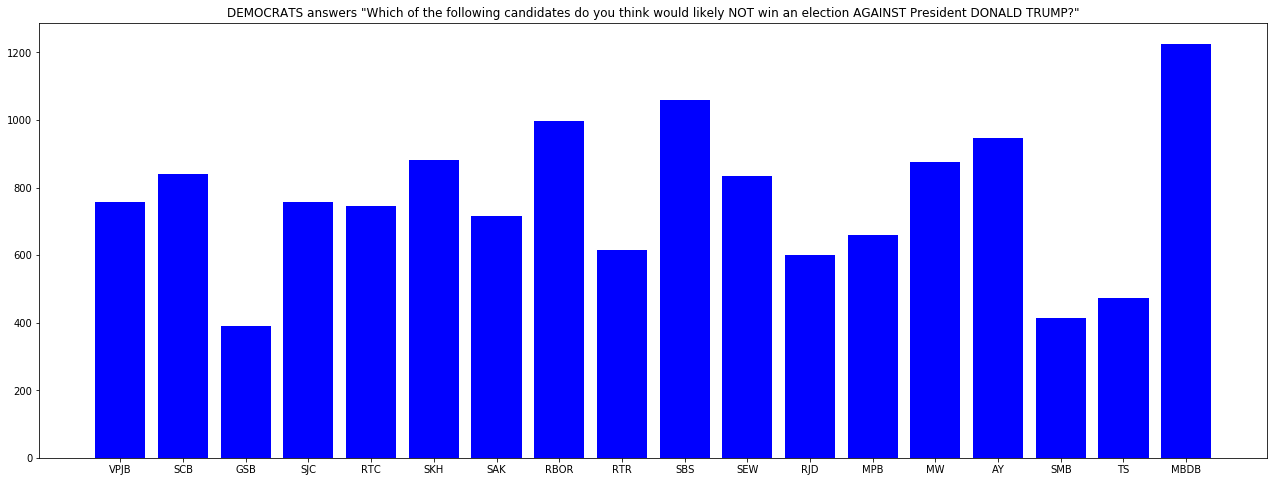

In [34]:
col_name_1 = []
for i in range(83, 101):
    col_name_1.append(df_democrat.columns[i])
temp_df = df_democrat[col_name_1]

list1 = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    list1.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('DEMOCRATS answers "Which of the following candidates do you think would likely NOT win an election AGAINST President DONALD TRUMP?"')
plt.bar(candidate_initials, list1, color='b')
plt.show()

VPJB, SBS and SEW share almost same popularity among democrats. SKH, RBOR, SCB, MPB, AY and MBDB are also pretty famous among democrats. 

In response to the question regarding approval of a particular candidate, VPJB , SBS and SEW left everyone behind. SKH is the only one who enjoys a considerable approval rate among her peers. She lies behind three above mentioned candidates but can challenge the three in future.

Tom Steyer who wasn't even in top 5 in the popularity and satisfaction list, tops the unsatisfaction rankings. Most of the democrats disapprove of him being the presidential candidate.

Among the previous top three contenders, the disapproval rate is lowest for SEW. SKH whose apporval rate was on the 4th place among democrats, has disapproval rate almost equal to of SEW.

Most of the democrats think VPJB as a strong candidate to defeat Pres. Trump. SBS and SEW are also thought of strong candidates to defeat Pres Trump but there strong_rating lies far below than VP Biden's strong_rating. SKH again stands at the 4th place.

Democrats think NYC Mayor Bill de Blasio as the weakest candidate to defeat Donald Trump. A small number of democrat respondents think that he can defeat PT while a very great number of people think that he is among those who can't defeat PT. 

###### What people with unknown political affiliations think of democratic candidates?

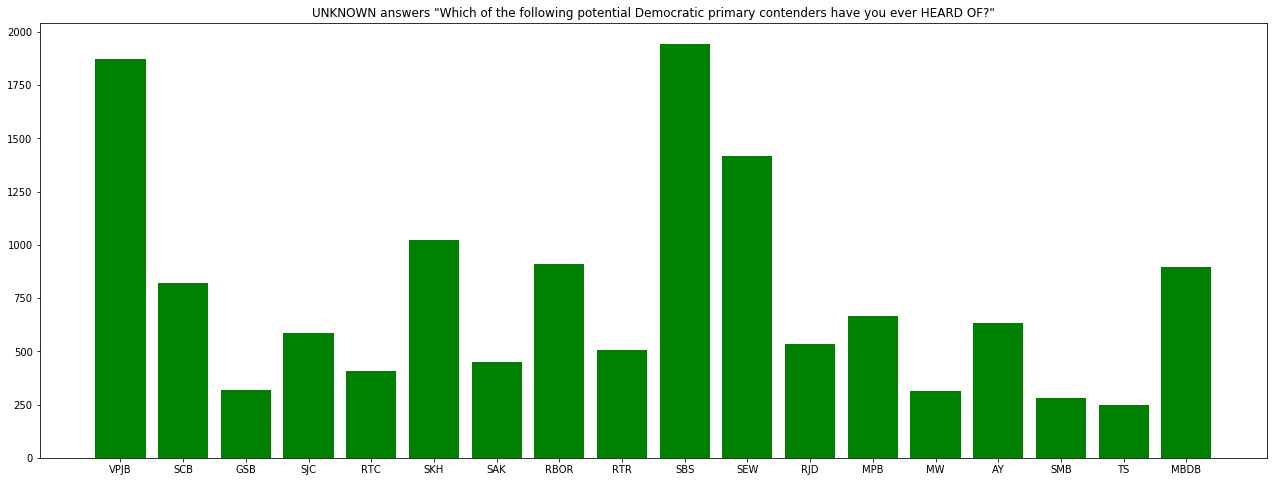

In [35]:
df_unknown = df[df['Affiliation'] == 'Unknown']

col_name_1 = []
for i in range(11, 29):
    col_name_1.append(df_unknown.columns[i])
temp_df = df_unknown[col_name_1]

list1 = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    list1.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('UNKNOWN answers "Which of the following potential Democratic primary contenders have you ever HEARD OF?"')
plt.bar(candidate_initials, list1, color='g')
plt.show()

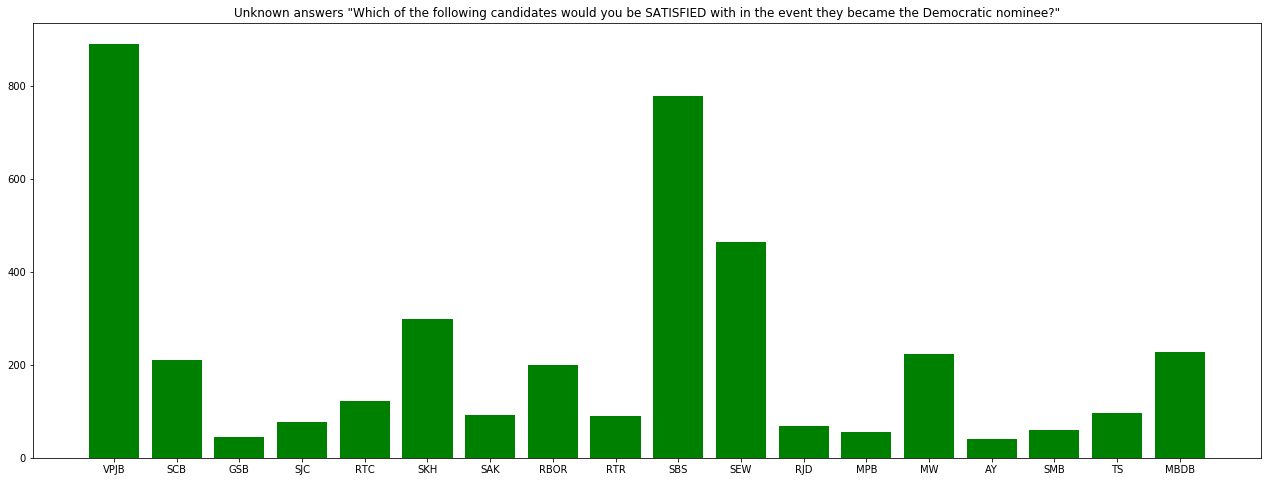

In [36]:
col_name_1 = []
for i in range(29, 47):
    col_name_1.append(df_unknown.columns[i])
temp_df = df_unknown[col_name_1]

list1 = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    list1.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('Unknown answers "Which of the following candidates would you be SATISFIED with in the event they became the Democratic nominee?"')
plt.bar(candidate_initials, list1, color='g')
plt.show()

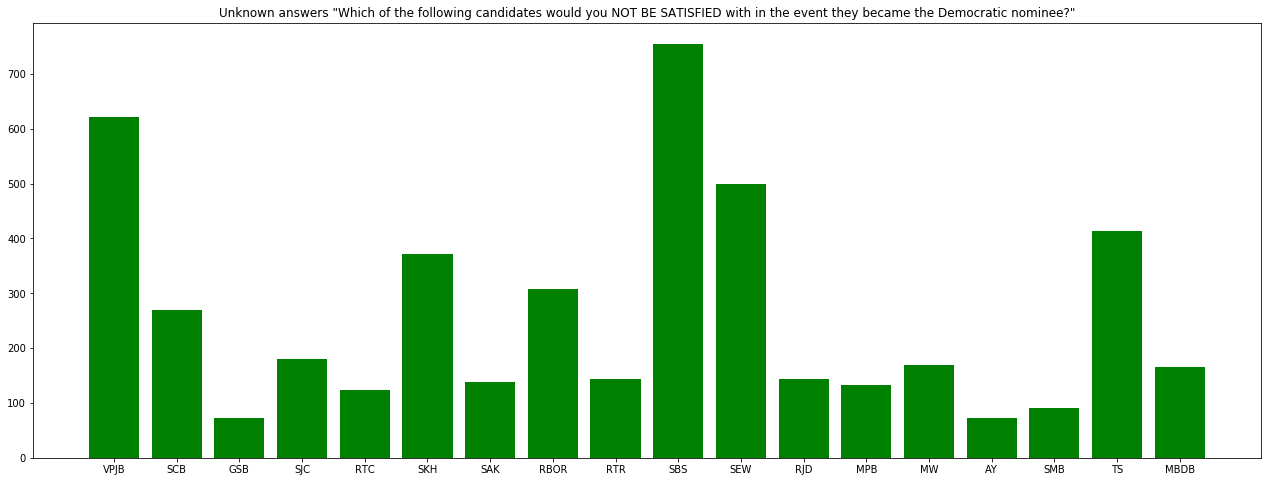

In [37]:
col_name_1 = []
for i in range(47, 65):
    col_name_1.append(df_unknown.columns[i])
temp_df = df_unknown[col_name_1]

list1 = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    list1.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('Unknown answers "Which of the following candidates would you NOT BE SATISFIED with in the event they became the Democratic nominee?"')
plt.bar(candidate_initials, list1, color='g')
plt.show()

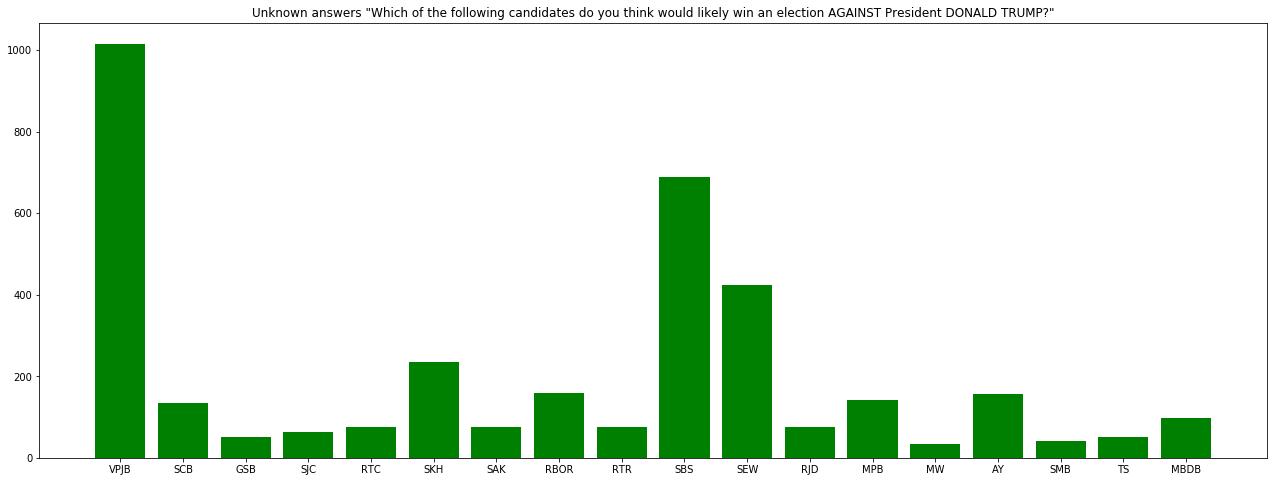

In [38]:
col_name_1 = []
for i in range(65, 83):
    col_name_1.append(df_unknown.columns[i])
temp_df = df_unknown[col_name_1]

list1 = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    list1.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('Unknown answers "Which of the following candidates do you think would likely win an election AGAINST President DONALD TRUMP?"')
plt.bar(candidate_initials, list1, color='g')
plt.show()

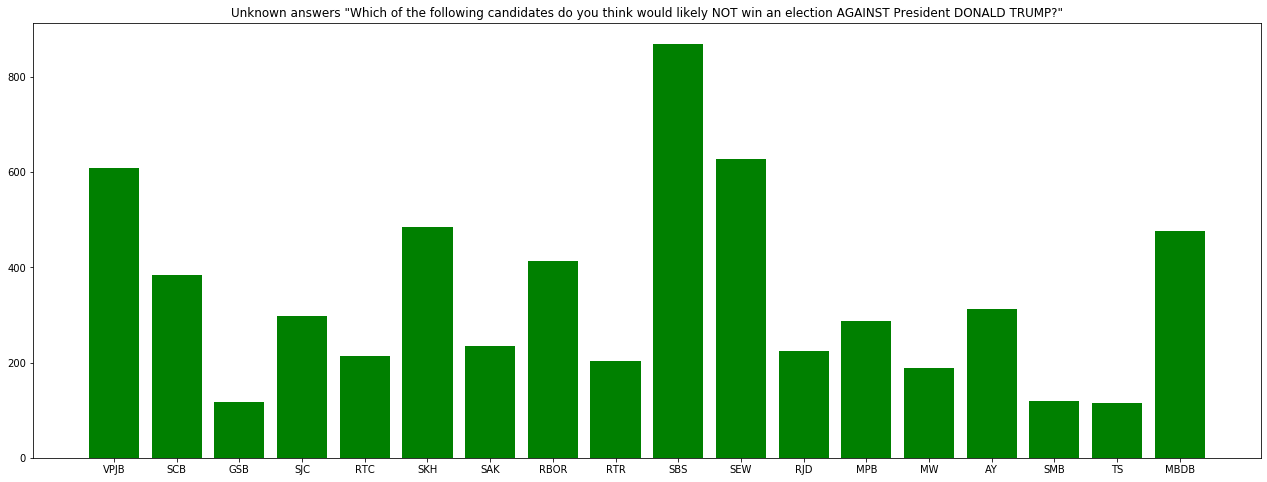

In [39]:
col_name_1 = []
for i in range(83, 101):
    col_name_1.append(df_unknown.columns[i])
temp_df = df_unknown[col_name_1]

list1 = []
for col in col_name_1:
    counts = temp_df[col].value_counts().tolist()
    list1.append(counts[0])

plt.figure(figsize=(22,8))
plt.title('Unknown answers "Which of the following candidates do you think would likely NOT win an election AGAINST President DONALD TRUMP?"')
plt.bar(candidate_initials, list1, color='g')
plt.show()

Again VPJB and SBS are the most popular. SEW ranks lower on the popularity ranking among people with unknown political affiliations but the gap is not too significant. 

The approval rating for VPJB and SBS is quite high, while SEW again lacks behind on this index as well. Along with approval rating the disapproval rating for SBS is quite high as well, his disapporval rating is greater than his other top two competitors, that is VPJB and SEW. TS again has a considerable disapproval rating while he was nowhere to see in approval or popularity rating.

VPJB is considered as the strongest democratic candidate who can potentially defeat PT. SBS and SEW lies far behind on strong_index. 

SBS is considered as the weakest candidate and MBDB is also considered weak candidate by a considerable number of people. His approval rate is low, he is low on strong_index but sits at a considerable height on weak_index.

###### Top 3 candidates

Based on the above analysis, top three candidates are chosen. These are VPJB, SBS and SEW. These three clearly are the most popular and enjoys a great approval rating among people with democratic political affiliation and unknown political affiliation. They also lead in strong_index for both the democrat and unknown categories.

In [40]:
# the data-frame is again restructured to contain the relevant information regarding top 3 candidates only.
top_candidates = ["Fmr. V.P. Joe Biden", "Sen. Bernie Sanders", "Sen. Elizabeth Warren"]

df1 = df[['Respondent ID', 'Start Date', 'Participate', 'Political_Belief', 'Registered_Voter', 'Race', 
             'Age', 'Gender', 'H_Income', 'Region', 'Affiliation']]
df2 = df
    
i = 0
for col in df.columns:
    values = df[col].value_counts().keys().tolist()
    if values[0] not in top_candidates:
        df2 = df2.drop(col, axis=1)
    else:
        df2 = df2.rename(columns={col:'col'+str(i)})
        i = i+1
    
top_df = pd.concat([df1, df2], axis= 1)
print(top_df.shape)

(10074, 26)


In [53]:
df_democrat = top_df[(top_df['Affiliation'] == 'Democrat') | (top_df['Affiliation'] == 'Unknown')]

Text(0.5, 1.0, 'Satisfaction Poll')

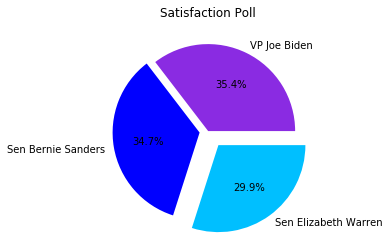

In [54]:
#Among Democrats
# Satisfaction Poll
col_name = []
for i in range(14, 17):
    col_name.append(df_democrat.columns[i])
temp_df = df_democrat[col_name]

list_2 = []
for col in col_name:
    counts = temp_df[col].value_counts().tolist()
    list_2.append(counts[0])
list_s = list_2

#Non-Satisfaction Poll
col_name = []
for i in range(17, 20):
    col_name.append(df_democrat.columns[i])
temp_df = df_democrat[col_name]

list_2 = []
for col in col_name:
    counts = temp_df[col].value_counts().tolist()
    list_2.append(counts[0])
list_ns = list_2

#Win Against Trump
col_name = []
for i in range(20, 23):
    col_name.append(df_democrat.columns[i])
temp_df = df_democrat[col_name]

list_2 = []
for col in col_name:
    counts = temp_df[col].value_counts().tolist()
    list_2.append(counts[0])
list_wgt = list_2

#Not Win against Trump
col_name = []
for i in range(23, 26):
    col_name.append(df_democrat.columns[i])
temp_df = df_democrat[col_name]

list_2 = []
for col in col_name:
    counts = temp_df[col].value_counts().tolist()
    list_2.append(counts[0])
list_nwgt = list_2


fig, ax = plt.subplots(1,1)

ax.pie(list_s,explode=(0, 0.1, 0.2), autopct='%1.1f%%', labels = ['VP Joe Biden','Sen Bernie Sanders', 'Sen Elizabeth Warren'], colors=['blueviolet','blue','deepskyblue'])
ax.set_title('Satisfaction Poll')

Text(0.5, 1.0, 'Non-Satisfaction Poll')

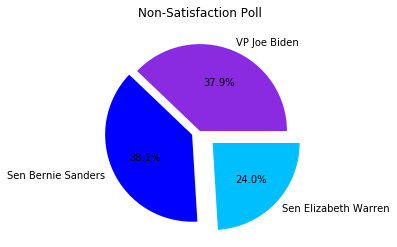

In [55]:
fig, ax = plt.subplots(1,1)
ax.pie(list_ns,explode=(0, 0.1, 0.2), autopct='%1.1f%%', labels = ['VP Joe Biden','Sen Bernie Sanders', 'Sen Elizabeth Warren'], colors=['blueviolet','blue','deepskyblue'])
ax.set_title('Non-Satisfaction Poll')

Text(0.5, 1.0, 'Win against Trump')

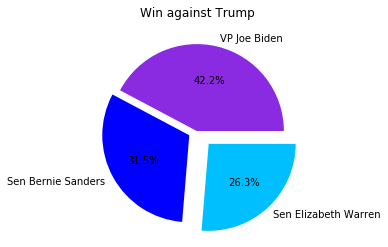

In [56]:
fig, ax = plt.subplots(1,1)
ax.pie(list_wgt,explode=(0, 0.1, 0.2), autopct='%1.1f%%', labels = ['VP Joe Biden','Sen Bernie Sanders', 'Sen Elizabeth Warren'], colors=['blueviolet','blue','deepskyblue'])
ax.set_title('Win against Trump')

Text(0.5, 1.0, 'Not win against Trump')

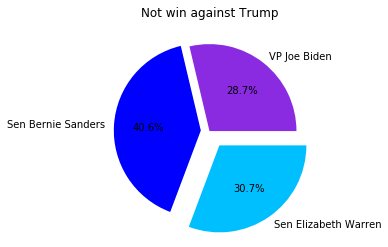

In [57]:
fig, ax = plt.subplots(1,1)
ax.pie(list_nwgt,explode=(0, 0.1, 0.2), autopct='%1.1f%%', labels = ['VP Joe Biden','Sen Bernie Sanders', 'Sen Elizabeth Warren'], colors=['blueviolet','blue','deepskyblue'])
ax.set_title('Not win against Trump')

Almost an equal propotion of non-republican respondents approve of all three top candidates (satisfaction_poll) but a lesser proportion would be unsatisfied if SEW is nominated as the presidential candidate. 

VP Joe Biden is considered as the strongest candidate among the top three to beat President Trump, while Sen. Bernie Sanders is considered weak, in terms of defeating President Trump.

#### 8. Conclusion

1) Top three presidential candidates for democrats are VP Joe Biden, Sen Bernie Sanders and Sen Elizabeth Warren.

2) Senator Kamala Harris stands at the 4th position, but she is not as popular among the indepedent* respondents as she is among the democrats.

3) Sen Bernie Sanders and VP Joe Biden are the most popular candidates.

4) Sen Elizabeth Warren is popularity takes a significant dip among the indepedent* respondents.

5) NYC Mayor Bill de Blasio is considered as the weakest candidate against President Trump by the democrats. He is also considered weak by a considerable number of independent respondents.

6) Tom Steyer is most disapproved candidate.

7) Among top three candidates, VP Joe Biden is considered as the strongest candidate while Sen Bernie Sanders is considered as the weakest candidate against President Trump.

8) Sen. Elizabet Warren is least disapproved among the top 3.



###### My suggestions
1) NYC Mayor Bill de Blasio and Tom Steyer should drop out of the presidential race.

2) Sen Kamala Harris should increase the intensity of her campaign's maginitude.

3) Democratic Party should go with only two of the top three presidential candidates in the primary, either with VP Joe Biden and Sen. Elizabeth Warren or Sen. Bernie Sanders and Sen Elizabeth Warren, as the above study suggests a strong division between the supporters of SEW and SBS. If either of them pull out, all the supporters of the other would most likely support Sen. Elizabeth Warren, since she got a low disapproval rating and supporters of VPJB may not want to support SBS and vice versa.

4) Sen Elizabeth Warren should focus more on independent voters.



*indepdent >> refers to the individuals who dont identufy themselves as republican and democrat.

#### 9. References

[1] Walt Hickey github [https://github.com/walterhickey] <br>